# PyQNI demonstration notebook - Battery materials

## Introduction

This notebook demonstrates how to create objects for Li-ion battery materials for quantitative neutron imaging using PyQNI, including electrodes loaded with various amounts of Li. Natural and isotopically enriched Li is considered.

## Imports

First, we import the PyQNI framework. If the notebook is placed in te different location, the PyQNI framework path has to be updated.

In [1]:
import sys
sys.path.append(r'C:\Software\pyqni\framework') # update path if necessary
from PyQNI import compound, solution, beam, detector

We will also use the *matplotlib* package to display charts and the *numpy* package to work with arrays.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Beam and detector definition

We select the NEUTRA beam:

In [3]:
neutra = beam('NEUTRA')

And we define a detector based on a 40 micrometer thick Gadox screen:

In [4]:
from PyQNI_scintillators import gadox_sc
gadox40 = detector(gadox_sc, thickness=0.004)

## Electrodes

Here, we first consider only the dry electrodes

### Graphite electrode

The graphite electrode loaded with graphite is defined by the formula ${Li}_xC_6$ where $x$ ranges from 0.0 (fully delithiated) to 1.0 (fully lithiated).

We assume a specific weight of 2.0 ${g/cm}^3$ for the pure graphite, and a local volume expansion of 13% (https://doi.org/10.1021/acs.jpcc.8b01873). As a result, the specific weight of ${LiC}_6$ is assumed to be 1.94 ${g/cm}^3$. In consequence, we define the specific weight of the compound as being $2.0 - 0.06x$ ${g/cm}^3$.

We also consider the porosity of the electrode. We assume a porosity of 25% for the unlithiated graphite, and that the local expansion of 13% is partly reducing the porosity, and partly expansive the total volume of the electrode. Assuming that half of the expansion goes into the porosity reduction, the solid volume fraction increases from 75% to 80% and the porosity is correspondingly reduced to 20% upon lithiation. The formula for the porosity as a funciton of $x$ is therefore $0.25 - 0.05x$.

Note that a compound can be defined using variables (such as $x$ here) and/or expressions of them. The value of $x$ does not need to be defined when the compound is created, but will be required when values such as cross sections need to be calculated.

In [5]:
graphite_li = compound({'Li':'x', 'C':6}, spec_weight = '2.0-0.06*x').add_porosity('0.25-0.05*x')
graphite_li6 = compound({'Li-6':'x', 'C':6}, nat_spec_weight = '2.0-0.06*x').add_porosity('0.25-0.05*x')

We then create a converter function which gives the effective attenuation coefficient (for the chosen beamline and detector) as a function of the parameter $x$:

In [6]:
cnv_ac_gr_li = graphite_li.get_converter(neutra, gadox40, param='x', pmin=0.0, pmax=1.0, result='ac')
cnv_ac_gr_li6 = graphite_li6.get_converter(neutra, gadox40, param='x', pmin=0.0, pmax=1.0, result='ac')

We compute the attenuation coefficient values for $0.0 < x < 1.0$:

In [7]:
x_vals = np.linspace(0.0, 1.0, 100)
ac_vals_gr_li = cnv_ac_gr_li(x_vals)
ac_vals_gr_li6 = cnv_ac_gr_li6(x_vals)

And we plot the results:

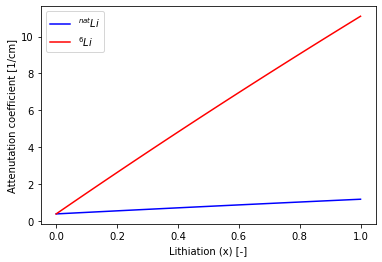

In [8]:
plt.plot(x_vals, ac_vals_gr_li, 'b-')
plt.plot(x_vals, ac_vals_gr_li6, 'r-')
plt.xlabel('Lithiation (x) [-]')
plt.ylabel('Attenutation coefficient [1/cm]')
plt.legend(['$^{nat}{Li}$','$^6{Li}$'])
plt.show()

In [13]:
elec_thick = 0.5

In [14]:
cnv_tr_gr_li = graphite_li.get_converter(neutra, gadox40, param='x', pmin=0.0, pmax=1.0, result='trans', thickness=elec_thick)
cnv_tr_gr_li6 = graphite_li6.get_converter(neutra, gadox40, param='x', pmin=0.0, pmax=1.0, result='trans', thickness=elec_thick)

In [15]:
tr_vals_gr_li = cnv_tr_gr_li(x_vals)
tr_vals_gr_li6 = cnv_tr_gr_li6(x_vals)

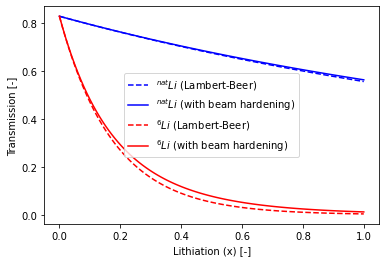

In [16]:
plt.plot(x_vals, np.exp(-elec_thick*ac_vals_gr_li), 'b--')
plt.plot(x_vals, tr_vals_gr_li, 'b-')
plt.plot(x_vals, np.exp(-elec_thick*ac_vals_gr_li6), 'r--')
plt.plot(x_vals, tr_vals_gr_li6, 'r-')
plt.xlabel('Lithiation (x) [-]')
plt.ylabel('Transmission [-]')
plt.legend(['$^{nat}{Li}$ (Lambert-Beer)','$^{nat}{Li}$ (with beam hardening)','$^6{Li}$ (Lambert-Beer)','$^6{Li}$ (with beam hardening)'])
plt.show()

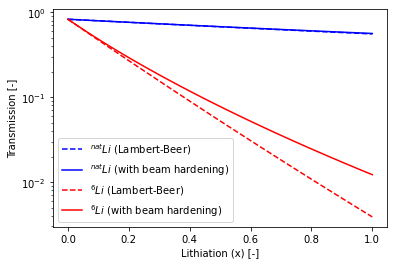

In [17]:
plt.semilogy(x_vals, np.exp(-0.5*ac_vals_gr_li), 'b--')
plt.plot(x_vals, tr_vals_gr_li, 'b-')
plt.plot(x_vals, np.exp(-0.5*ac_vals_gr_li6), 'r--')
plt.plot(x_vals, tr_vals_gr_li6, 'r-')
plt.xlabel('Lithiation (x) [-]')
plt.ylabel('Transmission [-]')
plt.legend(['$^{nat}{Li}$ (Lambert-Beer)','$^{nat}{Li}$ (with beam hardening)','$^6{Li}$ (Lambert-Beer)','$^6{Li}$ (with beam hardening)'])
plt.show()

### NMC electrode

In [20]:
nmc622_li = compound({'Li':'x', 'Co':1.0, 'O':2.0}, spec_weight = 2.6).add_porosity('0.25')
nmc622_li6 = compound({'Li-6':'x', 'Co':1.0, 'O':2.0}, nat_spec_weight = 2.6).add_porosity('0.25')

We then create a converter function which gives the effective attenuation coefficient (for the chosen beamline and detector) as a function of the parameter $x$:

In [21]:
cnv_ac_nmc622_li = nmc622_li.get_converter(neutra, gadox40, param='x', pmin=0.0, pmax=1.0, result='ac')
cnv_ac_nmc622_li6 = nmc622_li6.get_converter(neutra, gadox40, param='x', pmin=0.0, pmax=1.0, result='ac')

We compute the attenuation coefficient values for $0.0 < x < 1.0$:

In [22]:
x_vals = np.linspace(0.0, 1.0, 100)
ac_vals_nmc622_li = cnv_ac_nmc622_li(x_vals)
ac_vals_nmc622_li6 = cnv_ac_nmc622_li6(x_vals)

And we plot the results:

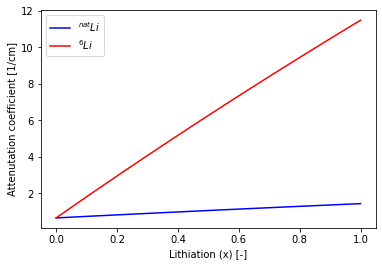

In [25]:
plt.plot(x_vals, ac_vals_nmc622_li, 'b-')
plt.plot(x_vals, ac_vals_nmc622_li6, 'r-')
plt.xlabel('Lithiation (x) [-]')
plt.ylabel('Attenutation coefficient [1/cm]')
plt.legend(['$^{nat}{Li}$','$^6{Li}$'])
plt.show()

In [13]:
elec_thick = 0.5

In [14]:
cnv_tr_gr_li = graphite_li.get_converter(neutra, gadox40, param='x', pmin=0.0, pmax=1.0, result='trans', thickness=elec_thick)
cnv_tr_gr_li6 = graphite_li6.get_converter(neutra, gadox40, param='x', pmin=0.0, pmax=1.0, result='trans', thickness=elec_thick)

In [15]:
tr_vals_gr_li = cnv_tr_gr_li(x_vals)
tr_vals_gr_li6 = cnv_tr_gr_li6(x_vals)

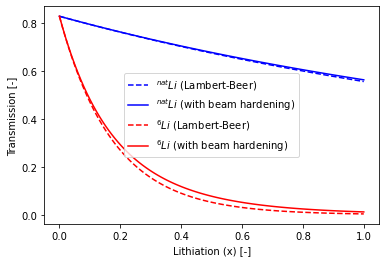

In [16]:
plt.plot(x_vals, np.exp(-elec_thick*ac_vals_gr_li), 'b--')
plt.plot(x_vals, tr_vals_gr_li, 'b-')
plt.plot(x_vals, np.exp(-elec_thick*ac_vals_gr_li6), 'r--')
plt.plot(x_vals, tr_vals_gr_li6, 'r-')
plt.xlabel('Lithiation (x) [-]')
plt.ylabel('Transmission [-]')
plt.legend(['$^{nat}{Li}$ (Lambert-Beer)','$^{nat}{Li}$ (with beam hardening)','$^6{Li}$ (Lambert-Beer)','$^6{Li}$ (with beam hardening)'])
plt.show()

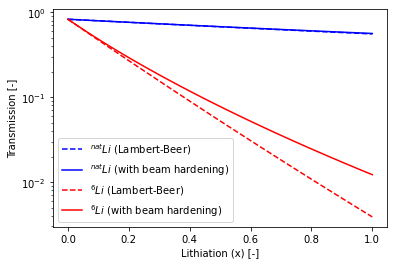

In [17]:
plt.semilogy(x_vals, np.exp(-0.5*ac_vals_gr_li), 'b--')
plt.plot(x_vals, tr_vals_gr_li, 'b-')
plt.plot(x_vals, np.exp(-0.5*ac_vals_gr_li6), 'r--')
plt.plot(x_vals, tr_vals_gr_li6, 'r-')
plt.xlabel('Lithiation (x) [-]')
plt.ylabel('Transmission [-]')
plt.legend(['$^{nat}{Li}$ (Lambert-Beer)','$^{nat}{Li}$ (with beam hardening)','$^6{Li}$ (Lambert-Beer)','$^6{Li}$ (with beam hardening)'])
plt.show()